**주분 1주차 패키지** - 진수정

In [ ]:
import numpy as np
import pandas as pd

# 1. 데이터 전처리

---


- 1.1 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/PSAT/data.csv")

- 1.2 데이터 확인

In [ ]:
data.head(5)

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [ ]:
data.tail(5)

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
1216548,1234823,9578,부산광역시,정관읍 용수리,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,59.8245,2012,201711,11~20,3,22000
1216549,1234824,9578,부산광역시,정관읍 용수리,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,84.9923,2012,201711,21~30,7,30750
1216550,1234825,9578,부산광역시,정관읍 용수리,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,84.9923,2012,201711,21~30,9,29500
1216551,1234826,9586,부산광역시,정관읍 용수리,1364,정관신도시롯데캐슬,정관읍 용수리 1364 정관신도시롯데캐슬,101.7400,2008,201711,21~30,7,26700
1216552,1234827,9578,부산광역시,정관읍 용수리,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,84.9923,2012,201711,21~30,16,28800


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  transaction_date        1216553 non-null  object 
 11  floor                   1216553 non-null  int64  
 12  transaction_real_price  1216553 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ M

Dim: 1216553 * 13

In [ ]:
data.isnull().sum()

transaction_id            0
apartment_id              0
city                      0
dong                      0
jibun                     0
apt                       0
addr_kr                   0
exclusive_use_area        0
year_of_completion        0
transaction_year_month    0
transaction_date          0
floor                     0
transaction_real_price    0
dtype: int64

결측값은 없음!

- 1.3 불필요한 행 삭제

In [ ]:
# 서울인 행만 남기기
data = data[data['city'] == '서울특별시']
data = data.reset_index(drop = True)

data.tail(5) # 지워졌는지 확인

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
742280,1196844,996,서울특별시,강일동,717,고덕리엔파크2단지,강일동 717 고덕리엔파크2단지,59.72,2011,201711,11~20,9,53000
742281,1196846,682,서울특별시,강일동,674,강일리버파크3단지,강일동 674 강일리버파크3단지,59.87,2009,201711,21~30,12,53000
742282,1196847,682,서울특별시,강일동,674,강일리버파크3단지,강일동 674 강일리버파크3단지,84.74,2009,201711,21~30,3,56500
742283,1196848,680,서울특별시,강일동,665,강일리버파크1단지,강일동 665 강일리버파크1단지,84.74,2009,201711,21~30,9,55500
742284,1196849,996,서울특별시,강일동,717,고덕리엔파크2단지,강일동 717 고덕리엔파크2단지,84.98,2011,201711,21~30,8,63750


- 1.4 변수 이름 바꾸기

In [ ]:
data = data.rename({'transaction_real_price':'price'},axis = 'columns')
data.columns # 바뀌었는지 확인

Index(['transaction_id', 'apartment_id', 'city', 'dong', 'jibun', 'apt',
       'addr_kr', 'exclusive_use_area', 'year_of_completion',
       'transaction_year_month', 'transaction_date', 'floor', 'price'],
      dtype='object')

- 1.5 불필요한 변수 삭제

In [ ]:
data = data.drop(['transaction_id','apartment_id','jibun','city'],axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742285 entries, 0 to 742284
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   dong                    742285 non-null  object 
 1   apt                     742285 non-null  object 
 2   addr_kr                 742285 non-null  object 
 3   exclusive_use_area      742285 non-null  float64
 4   year_of_completion      742285 non-null  int64  
 5   transaction_year_month  742285 non-null  int64  
 6   transaction_date        742285 non-null  object 
 7   floor                   742285 non-null  int64  
 8   price                   742285 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 51.0+ MB


Dim: 742285 * 9

- 1.6 연/월 뽑기

In [ ]:
data['transaction_year'] = data['transaction_year_month'] // 100
data['transaction_month'] = data['transaction_year_month'] % 100

data.loc[:5,['transaction_year_month','transaction_year','transaction_month']]

,transaction_year_month,transaction_year,transaction_month
0,200801,2008,1
1,200801,2008,1
2,200801,2008,1
3,200801,2008,1
4,200801,2008,1
5,200801,2008,1


- 1.7 필요 연도 뽑기

In [ ]:
data = data[data['transaction_year'] >= 2012]
data = data.reset_index(drop = True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513528 entries, 0 to 513527
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   dong                    513528 non-null  object 
 1   apt                     513528 non-null  object 
 2   addr_kr                 513528 non-null  object 
 3   exclusive_use_area      513528 non-null  float64
 4   year_of_completion      513528 non-null  int64  
 5   transaction_year_month  513528 non-null  int64  
 6   transaction_date        513528 non-null  object 
 7   floor                   513528 non-null  int64  
 8   price                   513528 non-null  int64  
 9   transaction_year        513528 non-null  int64  
 10  transaction_month       513528 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 43.1+ MB


Dim: 513528 * 11

# 2. 데이터 시각화

--- 


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

- 2.1 거래가격 분포 확인

Text(0.5, 0, 'Price')

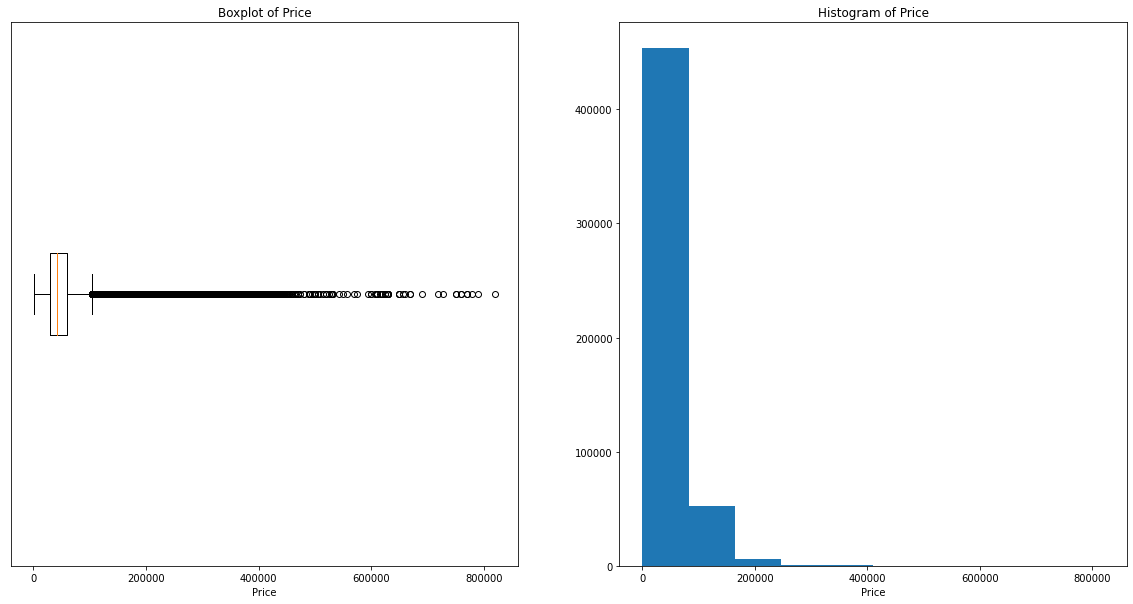

In [ ]:
firstplot = plt.figure(figsize=(20,10))
axes1 = firstplot.add_subplot(1, 2, 1)
axes2 = firstplot.add_subplot(1, 2, 2)

axes1.boxplot(data['price'],vert = False)
axes1.set_title('Boxplot of Price')
axes1.set_xlabel('Price')
axes1.set_yticks([])

axes2.hist(data['price'])
axes2.set_title('Histogram of Price')
axes2.set_xlabel('Price')

[Text(0.5, 0, 'Price'), Text(0.5, 1.0, 'Histogram of Price')]

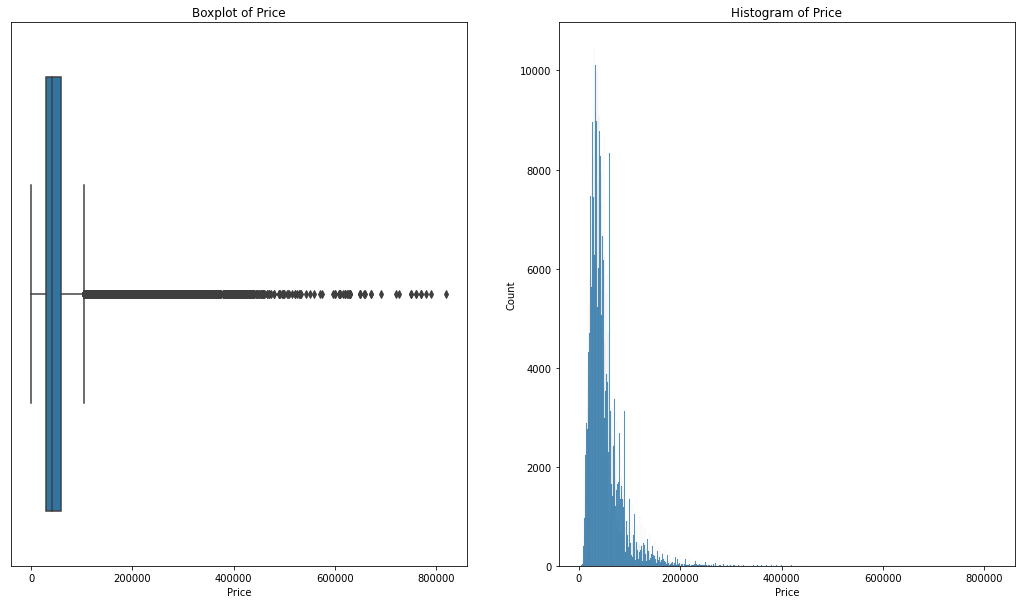

In [ ]:
fig, axs = plt.subplots(ncols = 2, figsize = (18, 10))

sns.boxplot(x = 'price',data = data,ax = axs[0])
sns.histplot(x = 'price',data = data,ax = axs[1])

axs[0].set(title = 'Boxplot of Price',xlabel = 'Price')
axs[0].set_yticks([])
axs[1].set(title = 'Histogram of Price',xlabel = 'Price')

거래가격의 분포가 200000 이하의 낮은 가격에 치우쳐져 있다.

- 2.2 거래연도 분포 확인 / 거래연도별 가격 분포 확인

[Text(0, 0.5, 'Price')]

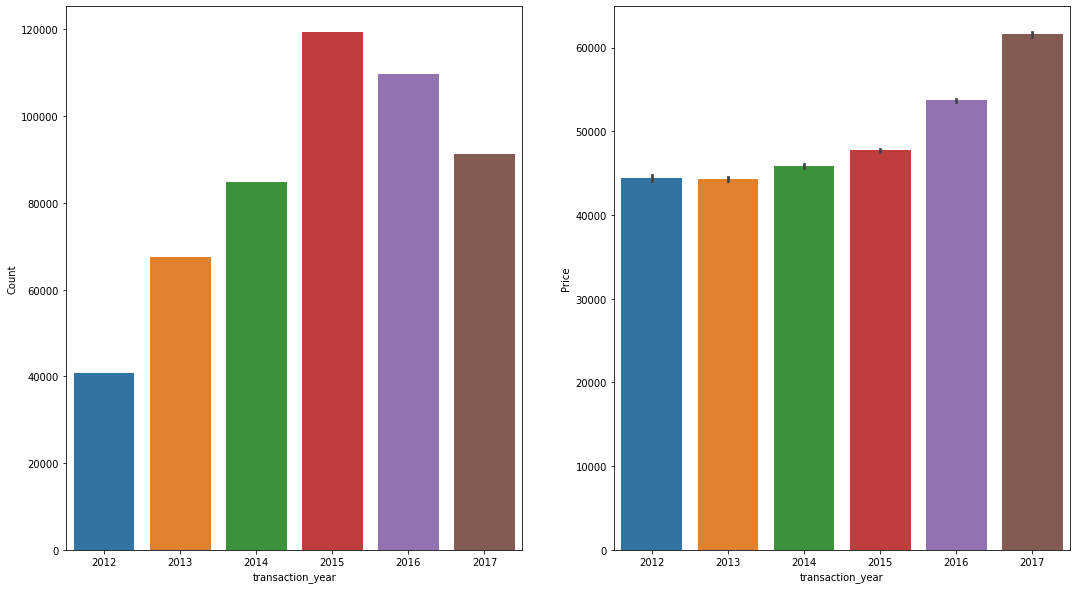

In [ ]:
fig, axs = plt.subplots(ncols = 2, figsize = (18, 10))

sns.countplot(x = 'transaction_year',data = data,ax = axs[0])
sns.barplot(x = 'transaction_year',y = data['price'],data = data,ax = axs[1])

axs[0].set(ylabel = 'Count')
axs[1].set(ylabel = 'Price')

(left) 2015년도까지 거래량이 꾸준히 증가하다가 이후에는 감소하였다.  

(right) 거래연도에 따른 평균 거래가격이 꾸준히 상승하였다.

- 2.3 층 분포 확인 / 층별 가격 분포 확인

[]

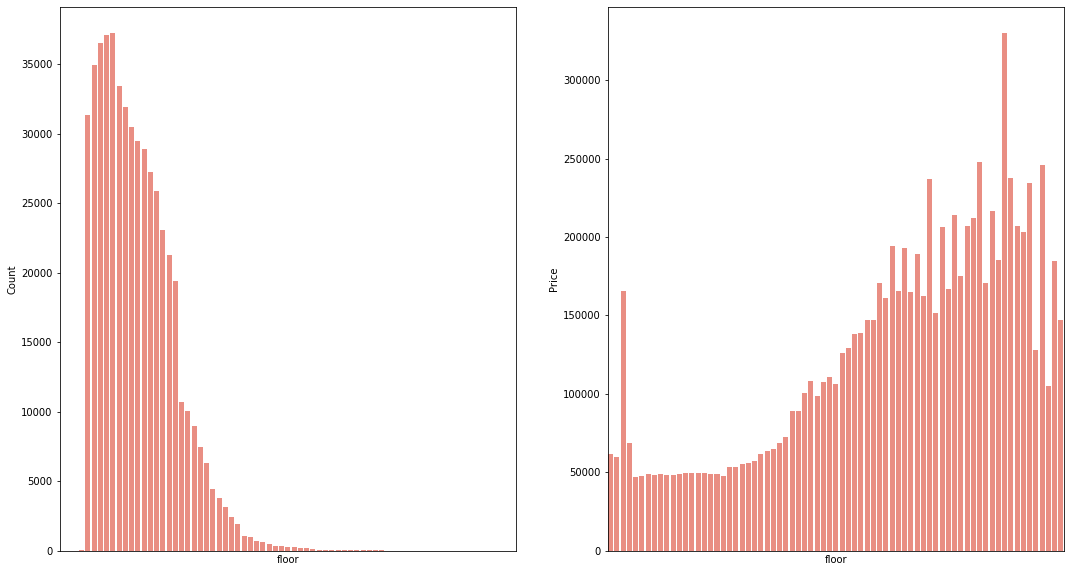

In [ ]:
fig, axs = plt.subplots(ncols = 2, figsize = (18, 10))

sns.countplot(x = 'floor',data = data,ax = axs[0],color = 'salmon')
sns.barplot(x = 'floor',y = data['price'],data = data,ax = axs[1],color = 'salmon',ci = None)

axs[0].set(ylabel = 'Count')
axs[0].set_xticks([])
axs[1].set(ylabel = 'Price')
axs[1].set_xticks([])

(left) 아파트 저층에 대한 거래가 거래의 대다수를 차지하고 있다.  
(right) 고층일수록 평균 거래가격이 높아지는 패턴을 확인할 수 있다.  

- 2.4 완공연도 분포 확인 / 완공연도별 가격 분포 확인

[]

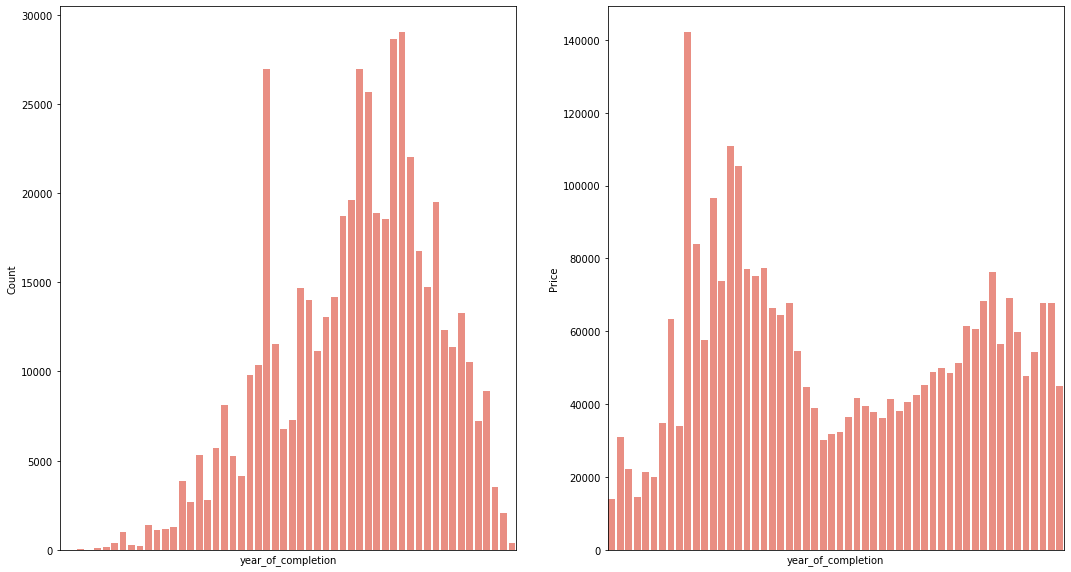

In [ ]:
fig, axs = plt.subplots(ncols = 2, figsize = (18, 10))

sns.countplot(x = 'year_of_completion',data = data,ax = axs[0],color = 'salmon')
sns.barplot(x = 'year_of_completion',y = data['price'],data = data,ax = axs[1],color = 'salmon',ci = None)

axs[0].set(ylabel = 'Count')
axs[0].set_xticks([])
axs[1].set(ylabel = 'Price')
axs[1].set_xticks([])

(left) 대체적으로 최근에 완공된 아파트가 많이 거래되고 있다.  
(right) 완공연도가 최근이라고 해서 평균거래가격이 반드시 더 비싸지는 않다. ( -> 3번에서 거래연도까지 고려)

# 3. 파생변수 생성

---


- 3.1 아파트 연차 변수 생성

In [ ]:
data['until_trans'] = data['transaction_year'] - data['year_of_completion']

[]

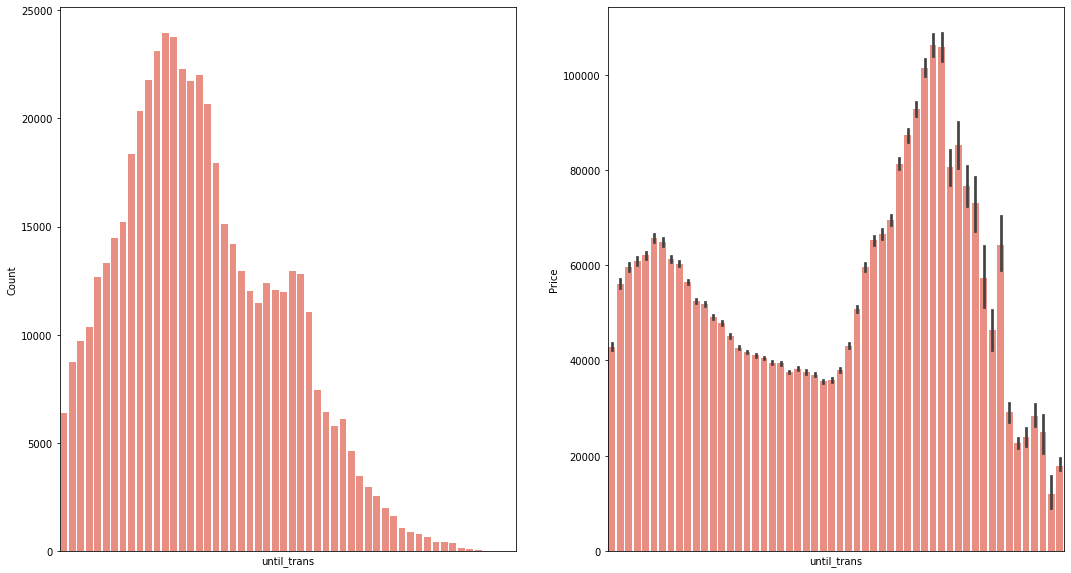

In [ ]:
fig, axs = plt.subplots(ncols = 2, figsize = (18, 10))

sns.countplot(x = 'until_trans',data = data,ax = axs[0],color = 'salmon')
sns.barplot(x = 'until_trans',y = data['price'],data = data,ax = axs[1],color = 'salmon')

axs[0].set(ylabel = 'Count')
axs[0].set_xticks([])
axs[1].set(ylabel = 'Price')
axs[1].set_xticks([])

(left) 연차가 오래되자 않은 아파트들이 많이 거래되었다.  
(right) 연차가 오래된 아파트들도 높은 가격에 거래되었다. 재개발 등의 요인이 작용하지 않았을까 싶다.

- 3.2 거래 일 변수 변환

In [ ]:
conditions = [
              (data['transaction_date'] == '1~10'),
              (data['transaction_date'] == '11~20')
]
data['transaction_date'] = np.select(conditions,[0,1],default = 2)

In [ ]:
data.loc[:10,'transaction_date']

0     0
1     1
2     1
3     0
4     2
5     2
6     2
7     0
8     0
9     1
10    1
Name: transaction_date, dtype: int64

- 3.3 월 변수와 10일 단위 변수 통합

In [ ]:
data['transaction_month_date'] = (data['transaction_month'] * 3 + data['transaction_date'])

data[['transaction_month_date', 'transaction_month', 'transaction_date']]

,transaction_month_date,transaction_month,transaction_date
0,3,1,0
1,4,1,1
2,4,1,1
3,3,1,0
4,5,1,2
...,...,...,...
513523,34,11,1
513524,35,11,2
513525,35,11,2
513526,35,11,2


- 3.4 연도별 주기성을 위한 파생변수 생성 (삼각변환)

In [ ]:
import math
md_in_year = 3 * 12

data['sin_date'] = np.sin(2 * np.pi * data['transaction_month_date'] / md_in_year)
data['cos_date'] = np.cos(2 * np.pi * data['transaction_month_date'] / md_in_year)

In [ ]:
data.head(10)

,dong,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,price,transaction_year,transaction_month,until_trans,transaction_month_date,sin_date,cos_date
0,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),95.88,2008,201201,0,6,70000,2012,1,4,3,0.500000,0.866025
1,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),108.55,2008,201201,1,11,100500,2012,1,4,4,0.642788,0.766044
2,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),94.51,2008,201201,1,1,65800,2012,1,4,4,0.642788,0.766044
3,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,42.87,2005,201201,0,8,30500,2012,1,7,3,0.500000,0.866025
4,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,39.67,2005,201201,2,15,30500,2012,1,7,5,0.766044,0.642788
5,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,39.67,2005,201201,2,16,25000,2012,1,7,5,0.766044,0.642788
6,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,39.67,2005,201201,2,14,31500,2012,1,7,5,0.766044,0.642788
7,익선동,현대뜨레비앙,익선동 55 현대뜨레비앙,45.50,2003,201201,0,9,25000,2012,1,9,3,0.500000,0.866025
8,익선동,현대뜨레비앙,익선동 55 현대뜨레비앙,36.08,2003,201201,0,6,19000,2012,1,9,3,0.500000,0.866025
9,익선동,현대뜨레비앙,익선동 55 현대뜨레비앙,46.64,2003,201201,1,5,22800,2012,1,9,4,0.642788,0.766044


In [ ]:
data = data.drop(['year_of_completion','transaction_year_month','transaction_date','transaction_month','transaction_month_date'],axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513528 entries, 0 to 513527
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   dong                513528 non-null  object 
 1   apt                 513528 non-null  object 
 2   addr_kr             513528 non-null  object 
 3   exclusive_use_area  513528 non-null  float64
 4   floor               513528 non-null  int64  
 5   price               513528 non-null  int64  
 6   transaction_year    513528 non-null  int64  
 7   until_trans         513528 non-null  int64  
 8   sin_date            513528 non-null  float64
 9   cos_date            513528 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 39.2+ MB


Dim: 513528 * 10

- 3.5 삼각변환을 통한 장점

시간 데이터를 처리할 때에는 주기성을 갖는 삼각변환을 활용하는 것이 용이하다.

# 4. 텍스트 데이터 다루기

---



- 4.1 아파트 이름 한글부분만 뽑기

In [ ]:
data['apt']

0         광화문풍림스페이스본(9-0)
1         광화문풍림스페이스본(9-0)
2         광화문풍림스페이스본(9-0)
3                로얄팰리스스위트
4                로얄팰리스스위트
               ...       
513523          고덕리엔파크2단지
513524          강일리버파크3단지
513525          강일리버파크3단지
513526          강일리버파크1단지
513527          고덕리엔파크2단지
Name: apt, Length: 513528, dtype: object

In [ ]:
import re
no_num = re.compile('[^0-9]')

removed = [''.join(filter(str.isalnum,apts)) for apts in data['apt']]
data['apt'] = [''.join(no_num.findall(apts)) for apts in removed]

data.head(5)

,dong,apt,addr_kr,exclusive_use_area,floor,price,transaction_year,until_trans,sin_date,cos_date
0,사직동,광화문풍림스페이스본,사직동 9 광화문풍림스페이스본(9-0),95.88,6,70000,2012,4,0.500000,0.866025
1,사직동,광화문풍림스페이스본,사직동 9 광화문풍림스페이스본(9-0),108.55,11,100500,2012,4,0.642788,0.766044
2,사직동,광화문풍림스페이스본,사직동 9 광화문풍림스페이스본(9-0),94.51,1,65800,2012,4,0.642788,0.766044
3,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,42.87,8,30500,2012,7,0.500000,0.866025
4,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,39.67,15,30500,2012,7,0.766044,0.642788


- 4.1 아파트 이름 DTM

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(min_df = 5)
cnt_apt = count_vectorizer.fit_transform(data['apt'])

In [ ]:
print(cnt_apt[0:10])

  (0, 347)	1
  (1, 347)	1
  (2, 347)	1
  (3, 1112)	1
  (4, 1112)	1
  (5, 1112)	1
  (6, 1112)	1
  (7, 3838)	1
  (8, 3838)	1
  (9, 3838)	1


In [ ]:
count_vectorizer.vocabulary_

{'광화문풍림스페이스본': 347,
 '로얄팰리스스위트': 1112,
 '현대뜨레비앙': 3838,
 '운현신화타워': 2800,
 '창신쌍용': 3245,
 '동대문': 839,
 '두산': 963,
 '종로청계힐스테이트': 3127,
 '동일상가': 933,
 '렉스팰리스': 1097,
 '삼성': 1698,
 '대아파크빌': 698,
 '세종로대우': 2110,
 '파크팰리스': 3517,
 '킹스매너': 3418,
 '경희궁의아침단지': 254,
 '동성아파트동': 879,
 '아남': 2438,
 '동아': 890,
 '롯데캐슬로잔': 1133,
 '크래스빌': 3413,
 '롯데낙천대': 1125,
 '인왕산아이파크': 2974,
 '현대': 3823,
 '미도파': 1355,
 '효성쥬얼리시티': 3994,
 '종로센트레빌': 3123,
 '대성맨션': 683,
 '청운현대': 3348,
 'cs타워': 8,
 '렉스빌': 1096,
 '창신이수': 3246,
 '브라운스톤창신': 1625,
 '벽산블루밍평창힐스': 1529,
 '갑을': 99,
 'mid그린동': 44,
 '르트랑시망': 1162,
 '무악다온채': 1320,
 '세종': 2107,
 '대성스카이렉스': 684,
 '하림빌라트': 3608,
 '도시그린빌라트': 804,
 '신동아블루아광화문의꿈': 2268,
 '리치캐슬아파트': 1192,
 '롯데캐슬천지인': 1146,
 '그린': 390,
 '부암스카이뷰': 1578,
 '동대문맨션': 840,
 '건양하늘터': 210,
 '일성빌라트': 2989,
 '아마레스': 2445,
 '숭인동동': 2186,
 '낙원': 486,
 '노블레스빌': 524,
 '대보': 676,
 '종로유케이': 3125,
 '삼전솔하임차': 1784,
 '두레엘리시안': 959,
 '주건축물제동': 3133,
 '종로동광모닝스카이': 3122,
 '신문로맨션': 2288,
 '이화에수풀': 2967,
 '숭인상가': 2187,
 '종로중흥s클래스'

- 4.3 아파트 이름 tf-idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df = 5)
tfidf_apt = tfidf_vectorizer.fit_transform(data['apt'])

In [ ]:
print(tfidf_apt[0:10])

  (0, 347)	1.0
  (1, 347)	1.0
  (2, 347)	1.0
  (3, 1112)	1.0
  (4, 1112)	1.0
  (5, 1112)	1.0
  (6, 1112)	1.0
  (7, 3838)	1.0
  (8, 3838)	1.0
  (9, 3838)	1.0


In [ ]:
tfidf_vectorizer.vocabulary_

{'광화문풍림스페이스본': 347,
 '로얄팰리스스위트': 1112,
 '현대뜨레비앙': 3838,
 '운현신화타워': 2800,
 '창신쌍용': 3245,
 '동대문': 839,
 '두산': 963,
 '종로청계힐스테이트': 3127,
 '동일상가': 933,
 '렉스팰리스': 1097,
 '삼성': 1698,
 '대아파크빌': 698,
 '세종로대우': 2110,
 '파크팰리스': 3517,
 '킹스매너': 3418,
 '경희궁의아침단지': 254,
 '동성아파트동': 879,
 '아남': 2438,
 '동아': 890,
 '롯데캐슬로잔': 1133,
 '크래스빌': 3413,
 '롯데낙천대': 1125,
 '인왕산아이파크': 2974,
 '현대': 3823,
 '미도파': 1355,
 '효성쥬얼리시티': 3994,
 '종로센트레빌': 3123,
 '대성맨션': 683,
 '청운현대': 3348,
 'cs타워': 8,
 '렉스빌': 1096,
 '창신이수': 3246,
 '브라운스톤창신': 1625,
 '벽산블루밍평창힐스': 1529,
 '갑을': 99,
 'mid그린동': 44,
 '르트랑시망': 1162,
 '무악다온채': 1320,
 '세종': 2107,
 '대성스카이렉스': 684,
 '하림빌라트': 3608,
 '도시그린빌라트': 804,
 '신동아블루아광화문의꿈': 2268,
 '리치캐슬아파트': 1192,
 '롯데캐슬천지인': 1146,
 '그린': 390,
 '부암스카이뷰': 1578,
 '동대문맨션': 840,
 '건양하늘터': 210,
 '일성빌라트': 2989,
 '아마레스': 2445,
 '숭인동동': 2186,
 '낙원': 486,
 '노블레스빌': 524,
 '대보': 676,
 '종로유케이': 3125,
 '삼전솔하임차': 1784,
 '두레엘리시안': 959,
 '주건축물제동': 3133,
 '종로동광모닝스카이': 3122,
 '신문로맨션': 2288,
 '이화에수풀': 2967,
 '숭인상가': 2187,
 '종로중흥s클래스'

- 4.4 질문

문제점: apt(아파트 브랜드명 + 지역명 + ..) 자체를 하나의 단어로 인식하고 있기 때문에, 아파트 브랜드만을 따로 구분해내지 못한다.  
해결방법: 지역명을 지워야 할 것 같다.

- 4.5 질문

# 5. 인코딩

---

In [ ]:
data = data.drop(columns = ['addr_kr'])

- 5.1 원핫 인코딩

In [ ]:
data.head(5)

,dong,apt,exclusive_use_area,floor,price,transaction_year,until_trans,sin_date,cos_date
0,사직동,광화문풍림스페이스본,95.88,6,70000,2012,4,0.500000,0.866025
1,사직동,광화문풍림스페이스본,108.55,11,100500,2012,4,0.642788,0.766044
2,사직동,광화문풍림스페이스본,94.51,1,65800,2012,4,0.642788,0.766044
3,수송동,로얄팰리스스위트,42.87,8,30500,2012,7,0.500000,0.866025
4,수송동,로얄팰리스스위트,39.67,15,30500,2012,7,0.766044,0.642788


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513528 entries, 0 to 513527
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   dong                513528 non-null  object 
 1   apt                 513528 non-null  object 
 2   exclusive_use_area  513528 non-null  float64
 3   floor               513528 non-null  int64  
 4   price               513528 non-null  int64  
 5   transaction_year    513528 non-null  int64  
 6   until_trans         513528 non-null  int64  
 7   sin_date            513528 non-null  float64
 8   cos_date            513528 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 35.3+ MB


In [ ]:
dummy_data = pd.get_dummies(data = data,columns = ['dong','apt'])
dummy_data = dummy_data.iloc[:,9:]
dummy_data = dummy_data.add_suffix('_onehot')
dummy_data.head(5)

,dong_가산동_onehot,dong_가양동_onehot,dong_갈월동_onehot,dong_갈현동_onehot,dong_강일동_onehot,dong_개봉동_onehot,dong_개포동_onehot,dong_거여동_onehot,dong_견지동_onehot,dong_고덕동_onehot,dong_고척동_onehot,dong_공덕동_onehot,dong_공릉동_onehot,dong_공항동_onehot,dong_광장동_onehot,dong_교남동_onehot,dong_교북동_onehot,dong_구기동_onehot,dong_구로동_onehot,dong_구산동_onehot,dong_구수동_onehot,dong_구의동_onehot,dong_군자동_onehot,dong_궁동_onehot,dong_금호동1가_onehot,dong_금호동2가_onehot,dong_금호동3가_onehot,dong_금호동4가_onehot,dong_길동_onehot,dong_길음동_onehot,dong_낙원동_onehot,dong_남가좌동_onehot,dong_남대문로5가_onehot,dong_남산동2가_onehot,dong_남창동_onehot,dong_남현동_onehot,dong_내곡동_onehot,dong_내발산동_onehot,dong_내수동_onehot,dong_냉천동_onehot,...,apt_휴먼_onehot,apt_휴먼빌_onehot,apt_휴먼스타빌_onehot,apt_휴먼시아단지_onehot,apt_휴먼씨티_onehot,apt_휴먼아파트A_onehot,apt_휴먼아파트B_onehot,apt_휴브리지빌딩_onehot,apt_흑석동양아파트_onehot,apt_흑석한강센트레빌_onehot,apt_흑석한강센트레빌Ⅱ_onehot,apt_흑석한강푸르지오_onehot,apt_흥양훼미리_onehot,apt_흥영_onehot,apt_흥원_onehot,apt_흥인_onehot,apt_흥인아이젠_onehot,apt_흥해오크팰리스_onehot,apt_흥화브라운빌_onehot,apt_흥화빌라_onehot,apt_흥화빌라트_onehot,apt_희락_onehot,apt_희훈리치파크_onehot,apt_희훈타워빌_onehot,apt_힐데스하임_onehot,apt_힐데스하임빌라_onehot,apt_힐스나인빌리지_onehot,apt_힐스빌_onehot,apt_힐스테이트_onehot,apt_힐스테이트서초젠트리스_onehot,apt_힐캐슬_onehot,apt_힐타운_onehot,apt_힐타워_onehot,apt_힐탑_onehot,apt_힐탑아파트차_onehot,apt_힐탑이루미_onehot,apt_힐탑트레져동_onehot,apt_힐튼_onehot,apt_힐튼빌리지차_onehot,apt_힐하우스_onehot
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


dong, apt 열을 삭제한 기존 데이터셋과 합치면 Dim: 513528 * 5592  

적절하지 않은 것 같다. 변수가 지나치게 많아지고, 새로 만들어진 dummy variable이 굉장히 sparse하기 때문 ????

- 5.2 레이블 인코딩 - transaction_year

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit([2012,2013,2014,2015,2016,2017])
data['transaction_year'] = le.transform(data['transaction_year'])

data.head(5)

,dong,apt,exclusive_use_area,floor,price,transaction_year,until_trans,sin_date,cos_date
0,사직동,광화문풍림스페이스본,95.88,6,70000,0,4,0.500000,0.866025
1,사직동,광화문풍림스페이스본,108.55,11,100500,0,4,0.642788,0.766044
2,사직동,광화문풍림스페이스본,94.51,1,65800,0,4,0.642788,0.766044
3,수송동,로얄팰리스스위트,42.87,8,30500,0,7,0.500000,0.866025
4,수송동,로얄팰리스스위트,39.67,15,30500,0,7,0.766044,0.642788


2.2 시각화에서 연도에 따른 평균 거래가격의 증가하는 정도가 일정하지 않았기 때문에 (2012 - 2015까지 큰 차이 없음) label encoding은 적합하지 않다고 생각한다.

- 5.3 레이블 인코딩

In [ ]:
data.apt.unique()

array(['광화문풍림스페이스본', '로얄팰리스스위트', '현대뜨레비앙', ..., '현대제이드', '풍천', '래미안강동팰리스'],
      dtype=object)

In [ ]:
le_dong = preprocessing.LabelEncoder()
le_dong.fit(data.dong.unique())
le_apt = preprocessing.LabelEncoder()
le_apt.fit(data.apt.unique())

data_label = data.copy()
data_label['dong_label'] = le_dong.transform(data['dong'])
data_label['apt_label'] = le_apt.transform(data['apt'])

data_label.head(10)

,dong,apt,exclusive_use_area,floor,price,transaction_year,until_trans,sin_date,cos_date,dong_label,apt_label
0,사직동,광화문풍림스페이스본,95.88,6,70000,0,4,0.500000,0.866025,130,424
1,사직동,광화문풍림스페이스본,108.55,11,100500,0,4,0.642788,0.766044,130,424
2,사직동,광화문풍림스페이스본,94.51,1,65800,0,4,0.642788,0.766044,130,424
3,수송동,로얄팰리스스위트,42.87,8,30500,0,7,0.500000,0.866025,164,1431
4,수송동,로얄팰리스스위트,39.67,15,30500,0,7,0.766044,0.642788,164,1431
5,수송동,로얄팰리스스위트,39.67,16,25000,0,7,0.766044,0.642788,164,1431
6,수송동,로얄팰리스스위트,39.67,14,31500,0,7,0.766044,0.642788,164,1431
7,익선동,현대뜨레비앙,45.50,9,25000,0,9,0.500000,0.866025,247,4971
8,익선동,현대뜨레비앙,36.08,6,19000,0,9,0.500000,0.866025,247,4971
9,익선동,현대뜨레비앙,46.64,5,22800,0,9,0.642788,0.766044,247,4971


적절하지 않다. 라벨 인코딩을 통해 할당된 값들이 순서나 연관성을 가지고 있지 않기 때문이다.

- 5.4 mean 인코딩

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513528 entries, 0 to 513527
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   dong                513528 non-null  object 
 1   apt                 513528 non-null  object 
 2   exclusive_use_area  513528 non-null  float64
 3   floor               513528 non-null  int64  
 4   price               513528 non-null  int64  
 5   transaction_year    513528 non-null  int64  
 6   until_trans         513528 non-null  int64  
 7   sin_date            513528 non-null  float64
 8   cos_date            513528 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 35.3+ MB


exclusive_use_area 데이터를 가지고 apt 변수에 대해 mean encoding을 해보았습니다,,

In [ ]:
mean_encoded = data.groupby(['apt'])['exclusive_use_area'].mean().to_dict()
mean_encoded

{'': 54.942804545454386,
 'AGS드림': 63.724285714285706,
 'APELBAUM': 180.254,
 'AQUADCASAS': 59.3,
 'AZ': 42.97,
 'AirPalace': 14.558064516129036,
 'AndPra레지던스': 15.259999999999996,
 'CG아름채목동아파트': 56.714173913043474,
 'CJ나인파크': 99.24419999999982,
 'CJ빌리지': 120.72999999999999,
 'CS타워': 22.075909090909086,
 'DK포시즌': 80.78571428571429,
 'DMC래미안e편한세상': 89.95798687089649,
 'DMC센트레빌': 79.90161458333348,
 'DMC아이파크': 84.62107913669074,
 'DMC파크뷰자이단지': 93.13490725806456,
 'DS': 64.94,
 'DUO': 15.970000000000017,
 'EGSoulLeader': 13.502244897959182,
 'EL샤틀레': 84.94,
 'E아름다운세상': 73.39936170212766,
 'FIRSTVIEW': 53.18272727272726,
 'GS자이': 197.75521739130434,
 'GS파크뷰': 43.62846153846154,
 'GV': 37.49,
 'G패밀리움': 63.85545454545454,
 'HD동': 48.16,
 'IS아파트': 60.548333333333325,
 'JS': 54.245000000000005,
 'KCC엠파이어리버': 145.2517391304348,
 'KLC': 64.3,
 'KNP': 84.64,
 'KNP이스트빌': 76.22631578947369,
 'KNP주상복합': 84.40200000000002,
 'LG그린': 102.876,
 'LG그린빌': 91.07,
 'LG선릉에클라트A': 38.66564102564103,
 'LG선릉에클라트

In [ ]:
data['exclusive_use_area_mean'] = data['apt'].map(mean_encoded)

data.head(10)

,dong,apt,exclusive_use_area,floor,price,transaction_year,until_trans,sin_date,cos_date,exclusive_use_area_mean
0,사직동,광화문풍림스페이스본,95.88,6,70000,0,4,0.500000,0.866025,121.129714
1,사직동,광화문풍림스페이스본,108.55,11,100500,0,4,0.642788,0.766044,121.129714
2,사직동,광화문풍림스페이스본,94.51,1,65800,0,4,0.642788,0.766044,121.129714
3,수송동,로얄팰리스스위트,42.87,8,30500,0,7,0.500000,0.866025,44.216667
4,수송동,로얄팰리스스위트,39.67,15,30500,0,7,0.766044,0.642788,44.216667
5,수송동,로얄팰리스스위트,39.67,16,25000,0,7,0.766044,0.642788,44.216667
6,수송동,로얄팰리스스위트,39.67,14,31500,0,7,0.766044,0.642788,44.216667
7,익선동,현대뜨레비앙,45.50,9,25000,0,9,0.500000,0.866025,45.762637
8,익선동,현대뜨레비앙,36.08,6,19000,0,9,0.500000,0.866025,45.762637
9,익선동,현대뜨레비앙,46.64,5,22800,0,9,0.642788,0.766044,45.762637


적절하지 않다.  
장점: 차원이 늘어나지 않는다.  
단점: 새로운 아파트가 지어진다면, 이에 대한 인코딩은 어떻게 할당할지 애매해질 수 있다.  